## Step 1: Load the Dataset
Start by loading the data and exploring the first few rows to understand the structure of the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
data = pd.read_csv('dataset.csv') #We already have the dataset divided into two parts, train and test, and now we need to merge these two parts to study the complete data.

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Understand Dataset Dimensions and Data Types
Check the size of the dataset and the types of data to ensure everything is correctly understood (e.g., numeric types, strings, etc.).

In [4]:
# Data types and general information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


## Step 3: Handle Missing Values (Data Cleaning)
Missing values can cause issues during analysis, so identify and deal with them appropriately.

In [5]:
# Check for missing values in each column
print(data.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [6]:

# Replace missing values in 'Age' column with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Replace missing value in 'Fare' with the mean
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

# For 'Cabin', create a new column 'Has_Cabin' to indicate if a passenger has a cabin or not
data['Has_Cabin'] = data['Cabin'].notnull().astype(int)

# Drop the 'Cabin' column if not necessary
data.drop('Cabin', axis=1, inplace=True)

# Fill missing values in 'Embarked' with the most frequent value (mode)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verify the missing values after the treatment
print(data.isnull().sum())


PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Has_Cabin        0
dtype: int64


The "Survived" column contains 418 missing values because they come from the test dataset, where the survival status of the passengers is unknown. This is normal, as the purpose of the test set is to predict whether these passengers survived or not.

## Step 4: Descriptive Statistical Analysis (EDA)
Start with descriptive statistics to get a general idea of the distributions of variables.

In [7]:
# Descriptive statistics for numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.503186,0.498854,0.385027,33.295479,0.225363
std,378.020061,0.486592,0.837836,12.905241,1.041658,0.865560,51.738879,0.417981
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [8]:
# View distribution of categorical variables like 'Sex' and 'Embarked'
print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

male      843
female    466
Name: Sex, dtype: int64
S    916
C    270
Q    123
Name: Embarked, dtype: int64


## Step 5: Data Visualization
Visualizations allow you to identify trends, patterns, and relationships between variables. Use matplotlib and seaborn for this purpose.

Visualize the distribution of survivors (Survived) across variables like age and gender:

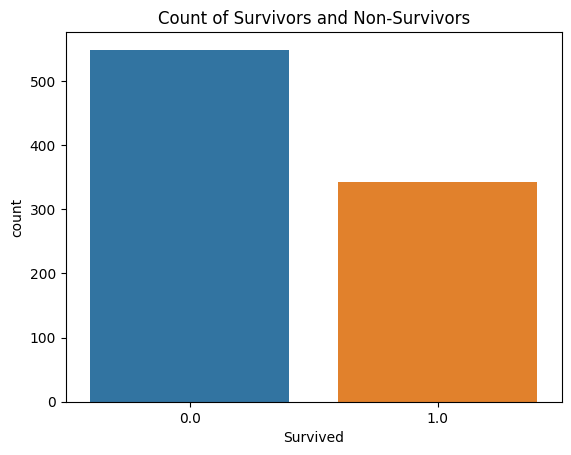

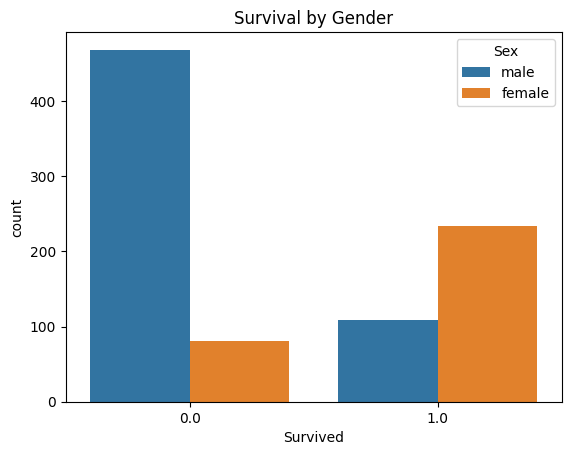

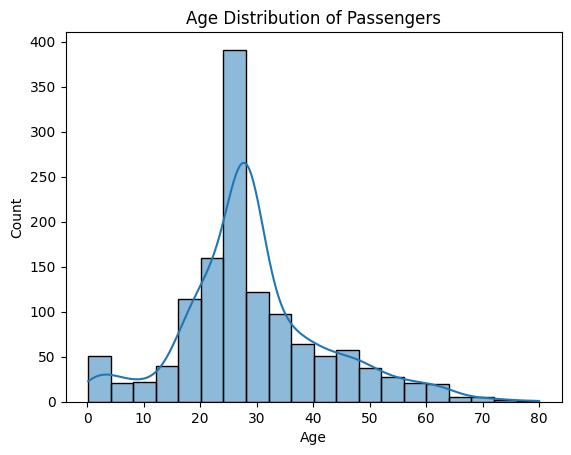

In [9]:
# Distribution of survivors
sns.countplot(x='Survived', data=data)
plt.title('Count of Survivors and Non-Survivors')
plt.show()

# Survival distribution by gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()

# Distribution of age
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

Visualize the relationship between continuous variables (e.g., Age, Fare) and the target variable (Survived):

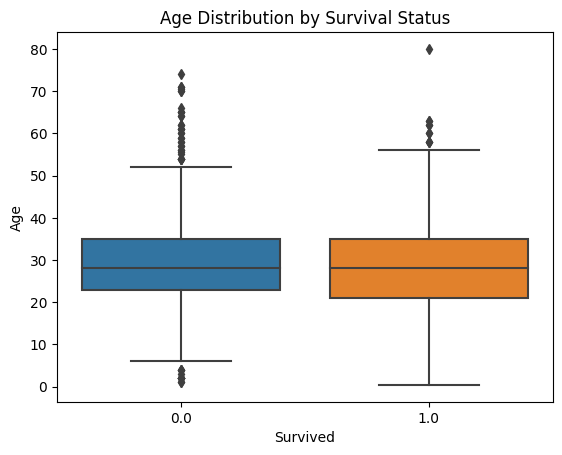

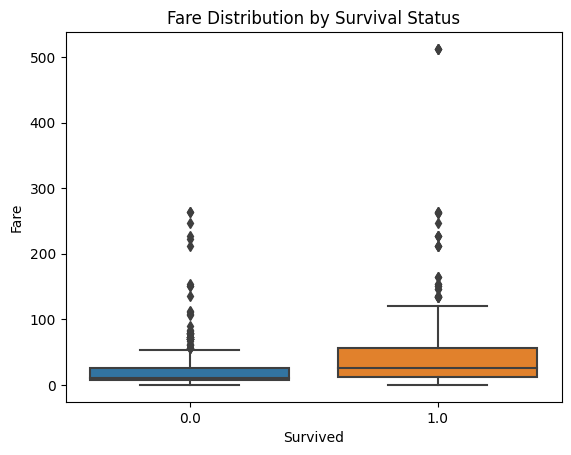

In [10]:
# Age distribution based on survival
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival Status')
plt.show()

# Fare distribution based on survival
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival Status')
plt.show()

Heatmap to observe correlations between numerical variables:

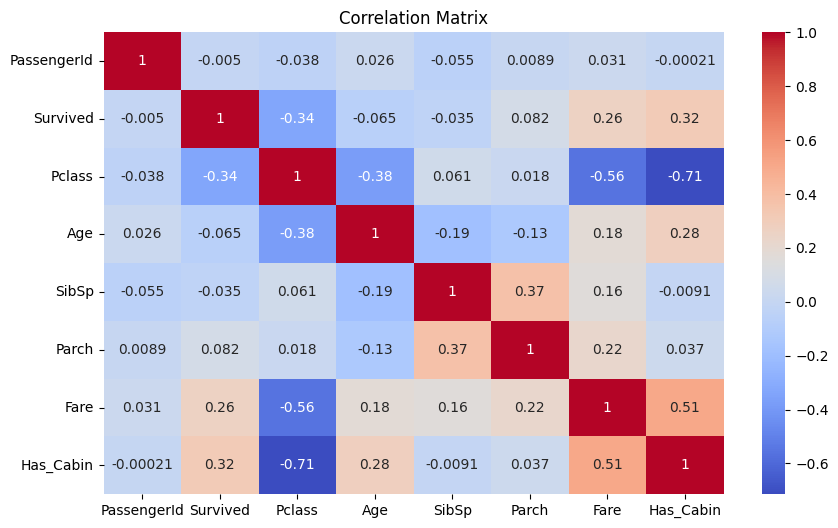

In [11]:
# Correlation matrix
corr_matrix = data.corr()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Step 6: Explore Relationships Between Variables
Dive deeper into the relationships between multiple variables like passenger class (Pclass), gender (Sex), age (Age), and survival (Survived).

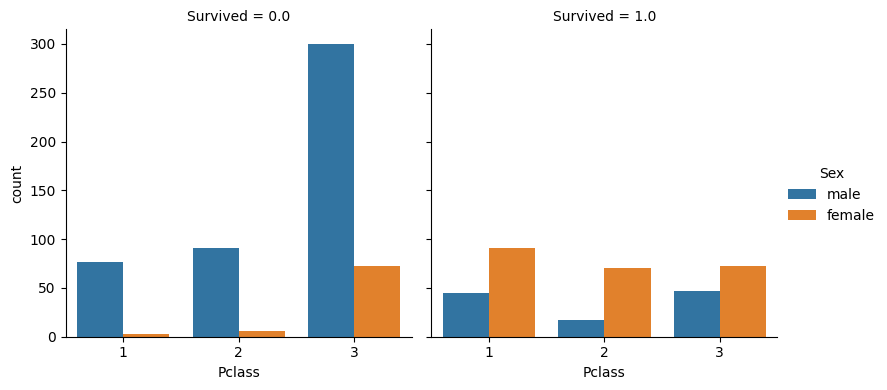

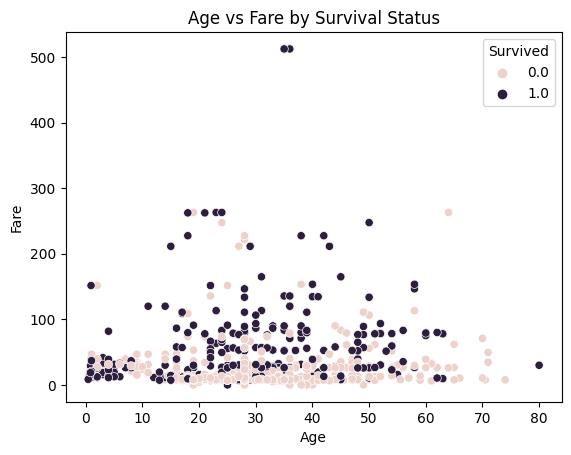

In [12]:
# Survival based on passenger class and gender
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=data, kind='count', height=4, aspect=1)
plt.show()

# Scatter plot: Age vs. Fare colored by survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Age vs Fare by Survival Status')
plt.show()

## Step 7: Draw Insights and Identify Patterns
After exploring the relationships between variables, you can start identifying trends and insights, such as:

*Women had a higher chance of survival compared to men.

*Passengers in first class had a better survival rate compared to those in other classes.

*Younger passengers had a higher survival rate than older ones.

## Step 8: Save Visualizations and Document Findings
Finally, don’t forget to document your insights and save your visualizations for your report.

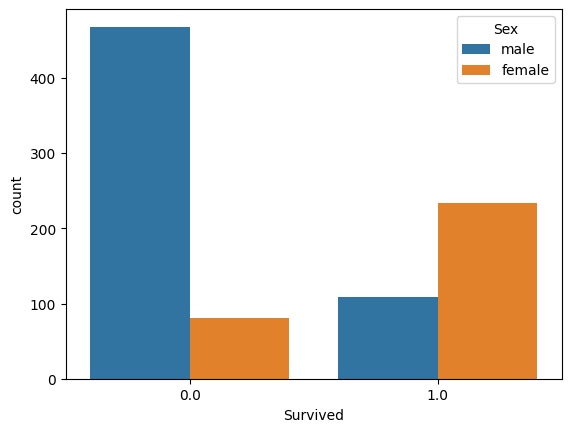

In [13]:
# Save the figure
fig = sns.countplot(x='Survived', hue='Sex', data=data)
fig.get_figure().savefig('survival_by_sex.png')
